<a href="https://colab.research.google.com/github/dynamite324/Image-Recognition-ML/blob/main/Image%20recognition%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaurikaagarwal","key":"03e524c5131a5e0fe45d289e634e9995"}'}

In [3]:
!mkdir ~/kaggle
!cp kaggle.json ~/kaggle/
!chmod 600 ~/kaggle/kaggle.json

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) - y_train shape: (60000,)


In [6]:
x_train = x_train /255.0
x_test = x_test /255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(f"train reshaped:(x_train.shape)")

train reshaped:(x_train.shape)


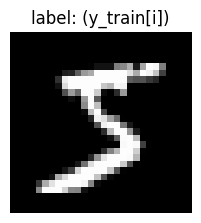

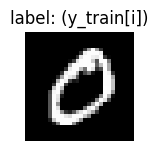

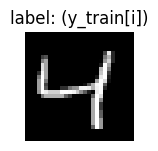

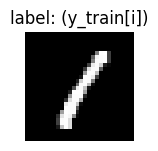

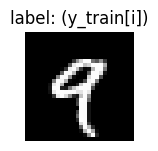

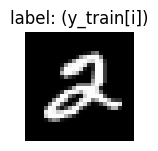

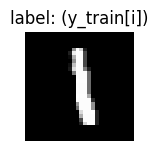

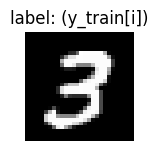

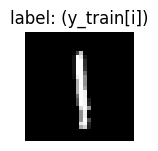

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"label: (y_train[i])")
  plt.axis("off")
  plt.show()

In [8]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10.astype('float32') / 255.0
X_test_c10 = X_test_c10.astype('float32') / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
model = Sequential([
 Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
 MaxPooling2D((2,2)),
 Conv2D(64,(3,3),activation='relu'),
 MaxPooling2D((2,2)),
 Flatten(),
 Dense(128,activation='relu'),
 Dense(10,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8963 - loss: 0.3377 - val_accuracy: 0.9797 - val_loss: 0.0636
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9850 - val_loss: 0.0523
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9939 - loss: 0.0209 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9880 - val_loss: 0.0461


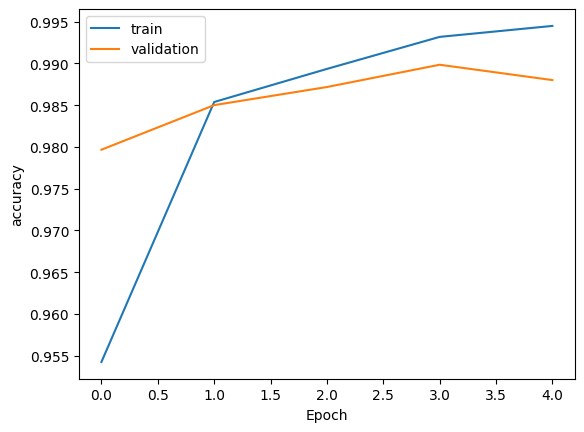

In [11]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9877 - loss: 0.0433
Test accuracy:0.9897
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [13]:
from tensorflow.keras.layers import Dropout
model = Sequential([
 Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
 MaxPooling2D((2,2)),
 Dropout(0.25),
 Conv2D(64,(3,3),activation='relu'),
 MaxPooling2D((2,2)),
 Dropout(0.25),
 Flatten(),
 Dense(128,activation='relu'),
 Dropout(0.5),
 Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_dropout = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8177 - loss: 0.5594 - val_accuracy: 0.9791 - val_loss: 0.0664
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9658 - loss: 0.1143 - val_accuracy: 0.9865 - val_loss: 0.0466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9744 - loss: 0.0832 - val_accuracy: 0.9881 - val_loss: 0.0407
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9784 - loss: 0.0717 - val_accuracy: 0.9891 - val_loss: 0.0394
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9806 - loss: 0.0620 - val_accuracy: 0.9911 - val_loss: 0.0339


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
 Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
 BatchNormalization(),
 MaxPooling2D((2,2)),
 Conv2D(64,(3,3),activation='relu'),
 MaxPooling2D((2,2)),
 Conv2D(128,(3,3),activation='relu'),
 MaxPooling2D((2,2)),
 Flatten(),
 Dense(256,activation='relu'),
 Dropout(0.5),
 Dense(10,activation='softmax'),
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 87ms/step - accuracy: 0.3464 - loss: 1.7802 - val_accuracy: 0.5467 - val_loss: 1.2854
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.5451 - loss: 1.2965 - val_accuracy: 0.5489 - val_loss: 1.3068
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.5916 - loss: 1.1657 - val_accuracy: 0.6236 - val_loss: 1.1100
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.6204 - loss: 1.0749 - val_accuracy: 0.6490 - val_loss: 0.9931
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.6411 - loss: 1.0297 - val_accuracy: 0.6545 - val_loss: 1.0231
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.6553 - loss: 0.9933 - val_accuracy: 0.6441 - val_loss: 1.0341
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.6729 - loss: 0.9631 - val_accuracy: 0.6765 - val_loss: 0.9582
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 84ms/step - accuracy: 0.6739 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.80      0.86      0.83      1000
           2       0.75      0.47      0.58      1000
           3       0.61      0.49      0.55      1000
           4       0.69      0.61      0.65      1000
           5       0.78      0.50      0.61      1000
           6       0.63      0.87      0.73      1000
           7       0.67      0.81      0.73      1000
           8       0.88      0.77      0.82      1000
           9       0.64      0.89      0.74      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



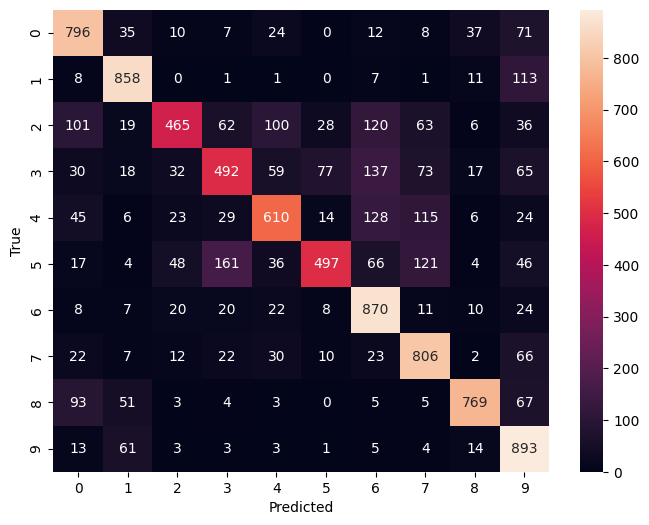

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10= model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gaurikaagarwal","key":"03e524c5131a5e0fe45d289e634e9995"}'}

In [19]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!ls -l ~/kaggle

total 4
-rw------- 1 root root 70 Aug 20 12:38 kaggle.json


In [21]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 206M/218M [00:00<00:00, 385MB/s] 
100% 218M/218M [00:00<00:00, 397MB/s]


In [22]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/cat-and-dog')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    '/content/cat-and-dog', target_size=(224,224),batch_size=32,
    class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/cat-and-dog', target_size=(224,224),batch_size=32,
    class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.7822 - loss: 0.5427 - val_accuracy: 0.7985 - val_loss: 0.5173
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.7999 - loss: 0.4952 - val_accuracy: 0.7985 - val_loss: 0.5132
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.7957 - loss: 0.4951 - val_accuracy: 0.7985 - val_loss: 0.5186
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.8062 - loss: 0.4692 - val_accuracy: 0.7945 - val_loss: 0.5381
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.8020 - loss: 0.4607 - val_accuracy: 0.7985 - val_loss: 0.5701


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2053s 8s/step - accuracy: 0.7984 - loss: 0.4898 - val_accuracy: 0.7985 - val_loss: 0.5165
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1869s 7s/step - accuracy: 0.8023 - loss: 0.4687 - val_accuracy: 0.7985 - val_loss: 0.5192
Epoch 3/3
224/251 ━━━━━━━━━━━━━━━━━━━━ 3:13 7s/step - accuracy: 0.7988 - loss: 0.4509

In [35]:
model.save('mobilenet_cats_dogs.keras')
#to load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.keras')

63/63 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step


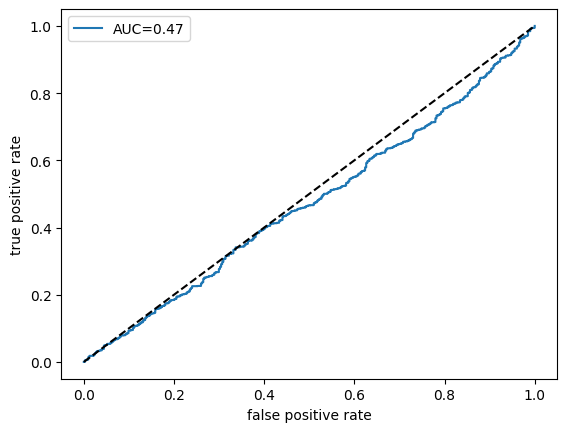

In [34]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label='AUC={:.2f}'.format(roc_auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [36]:
from google.colab import files
uploaded=files.upload() #upload e.g. 'cat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path='download.jpg' #replace with your filename
img=image.load_img('cat.jpg',target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=preprocess_input(img_array)
prediction=loaded_model.predict(img_array)
prediction=loaded_model.predict(img_array)
print ("predicted class:", "dog" if prediction[0][0] > 0.5 else "cat")


Saving cat.jpg to cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
predicted class: dog


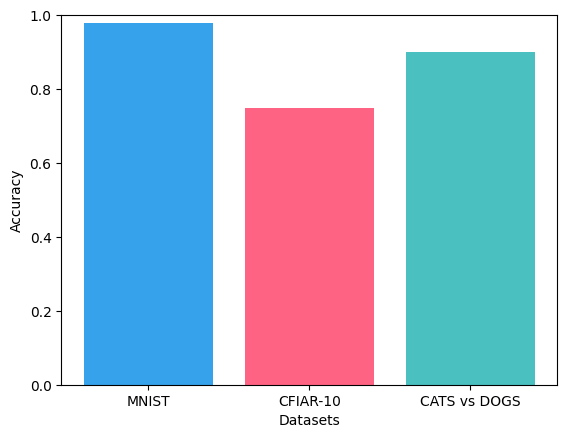

In [42]:
import matplotlib.pyplot as plt
datasets=['MNIST','CFIAR-10','CATS vs DOGS']
Accuracies= [0.98,0.75,0.90]
plt.bar(datasets,Accuracies,color=['#36A2EB','#FF6384','#4BC0C0'])
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()